# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Figo Kurniawan Siswanto
- **Email:** kurniawanfigo25@gmail.com
- **ID Dicoding:** figo_kurniawan

## Menentukan Pertanyaan Bisnis

- Pada tahun berapakah terdapat penurunan polusi udara pada seluruh stasiun keseluruhan?
- Stasiun manakah yang memiliki tingkat polusi paling sedikit?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
aotizhongxin_df = pd.read_csv('/content/drive/MyDrive/DriveCSV/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
changping_df = pd.read_csv('/content/drive/MyDrive/DriveCSV/PRSA_Data_Changping_20130301-20170228.csv')
dingling_df = pd.read_csv('/content/drive/MyDrive/DriveCSV/PRSA_Data_Dingling_20130301-20170228.csv')
dongsi_df = pd.read_csv('/content/drive/MyDrive/DriveCSV/PRSA_Data_Dongsi_20130301-20170228.csv')
guanyuan_df = pd.read_csv('/content/drive/MyDrive/DriveCSV/PRSA_Data_Guanyuan_20130301-20170228.csv')
gucheng_df = pd.read_csv('/content/drive/MyDrive/DriveCSV/PRSA_Data_Gucheng_20130301-20170228.csv')
huairou_df = pd.read_csv('/content/drive/MyDrive/DriveCSV/PRSA_Data_Huairou_20130301-20170228.csv')
nongzhanguan_df = pd.read_csv('/content/drive/MyDrive/DriveCSV/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
shunyi_df = pd.read_csv('/content/drive/MyDrive/DriveCSV/PRSA_Data_Shunyi_20130301-20170228.csv')
tiantan_df = pd.read_csv('/content/drive/MyDrive/DriveCSV/PRSA_Data_Tiantan_20130301-20170228.csv')
wanliu_df = pd.read_csv('/content/drive/MyDrive/DriveCSV/PRSA_Data_Wanliu_20130301-20170228.csv')
wanshouxigong_df = pd.read_csv('/content/drive/MyDrive/DriveCSV/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

combined_df = pd.concat([aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df,
                         huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df], ignore_index=False)
combined_df.to_csv('Combined_PRSA_Data.csv', index=False)

print(combined_df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


In [4]:
print(combined_df.info)

<bound method DataFrame.info of           No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
35060  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
35061  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
35062  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
35063  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

       TEMP    PRES  DEWP  RAIN

### Assessing Data

In [5]:
combined_df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [6]:
combined_df.duplicated().sum()

0

### Cleaning Data

In [7]:
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for column in numeric_columns:
    mean_value = combined_df[column].mean()
    combined_df[column].fillna(mean_value, inplace=True)

mode_value = combined_df['wd'].mode()[0]
combined_df['wd'].fillna(mode_value, inplace=True)

print(combined_df.isnull().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
combined_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,79.978679,91.066422,21.417257,34.618463,1131.283304,55.760484,11.430729,10.469162,13.787240,0.820624,NaN,1.245914,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,84.000000,8.000000,45.000000,900.000000,47.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>]], dtype=object)

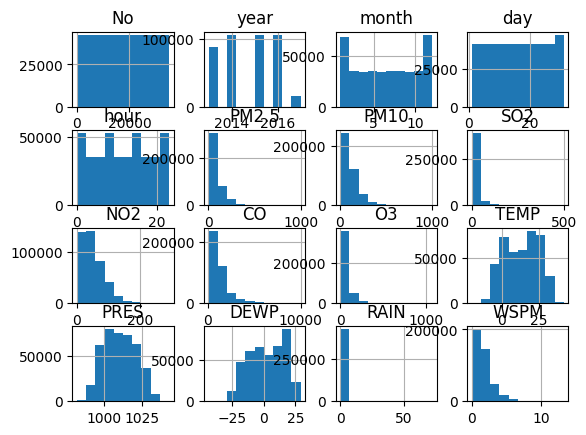

In [9]:
combined_df.hist()

In [10]:
combined_df.corr()

<ipython-input-10-6f36fa2e6f91>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combined_df.corr()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.023348,-0.043914,-0.224486,-0.045919,0.018960,-0.050021,-0.122332,0.188165,-0.101907,0.004874,0.054193
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,-2.115260e-15,-0.025605,-0.037475,-0.168632,-0.055590,0.007555,-0.023968,-0.151670,0.186519,-0.164686,0.000975,0.087429
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,-1.905981e-16,0.010341,-0.025185,-0.211783,0.041690,0.045478,-0.101881,0.131213,-0.012784,0.265549,0.016052,-0.139573
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,1.013388e-17,0.003391,0.025798,-0.005085,0.009725,-0.015321,0.002784,0.014385,0.021749,0.023061,-0.003697,-0.011642
hour,0.000684,-2.115260e-15,-1.905981e-16,1.013388e-17,1.000000e+00,0.011606,0.051073,0.029626,-0.001538,-0.030604,0.277640,0.141924,-0.038351,-0.012211,0.012376,0.140437
PM2.5,-0.023348,-2.560478e-02,1.034053e-02,3.390902e-03,1.160579e-02,1.000000,0.879389,0.477582,0.658108,0.768664,-0.147204,-0.129715,0.018357,0.113499,-0.014156,-0.269023
PM10,-0.043914,-3.747533e-02,-2.518507e-02,2.579828e-02,5.107307e-02,0.879389,1.000000,0.458519,0.645448,0.686716,-0.109983,-0.095395,-0.017806,0.069767,-0.026360,-0.181835
SO2,-0.224486,-1.686324e-01,-2.117831e-01,-5.085191e-03,2.962574e-02,0.477582,0.458519,1.000000,0.491109,0.524707,-0.162283,-0.318067,0.220414,-0.263895,-0.040029,-0.107549
NO2,-0.045919,-5.558991e-02,4.169005e-02,9.725404e-03,-1.538160e-03,0.658108,0.645448,0.491109,1.000000,0.688207,-0.463523,-0.273864,0.171262,-0.031135,-0.043357,-0.393849
CO,0.018960,7.554741e-03,4.547757e-02,-1.532101e-02,-3.060377e-02,0.768664,0.686716,0.524707,0.688207,1.000000,-0.305255,-0.317872,0.183004,-0.055615,-0.013008,-0.290044


<Axes: >

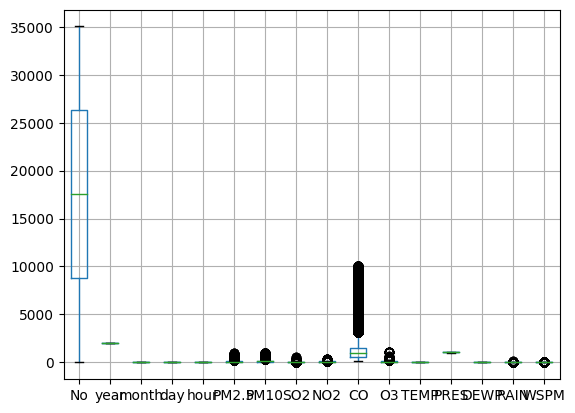

In [11]:
combined_df.boxplot()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada tahun berapakah terdapat penurunan polusi udara pada seluruh stasiun keseluruhan?

<ipython-input-12-a1335650606c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_pollution_by_year = combined_df.groupby(combined_df['year'].dt.year).mean()


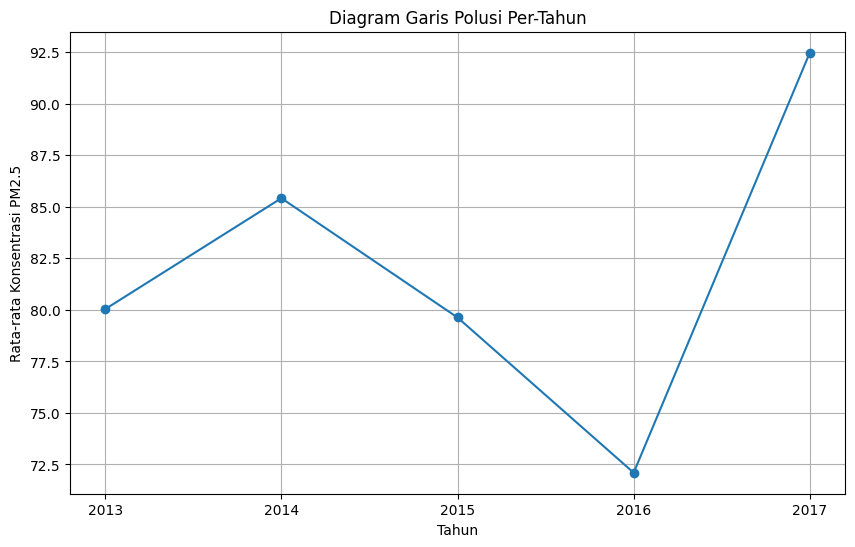

Terdapat penurunan polusi udara pada seluruh stasiun pada tahun: [2015, 2016]


In [12]:
combined_df['year'] = pd.to_datetime(combined_df['year'], format='%Y')
avg_pollution_by_year = combined_df.groupby(combined_df['year'].dt.year).mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_pollution_by_year.index, avg_pollution_by_year['PM2.5'], marker='o')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Konsentrasi PM2.5')
plt.title('Diagram Garis Polusi Per-Tahun')
plt.grid(True)
plt.xticks(avg_pollution_by_year.index)
plt.show()

years_with_decrease = avg_pollution_by_year[avg_pollution_by_year['PM2.5'].diff() < 0].index
years_list = years_with_decrease.tolist()
print("Terdapat penurunan polusi udara pada seluruh stasiun pada tahun:", years_list)

### Pertanyaan 2: Stasiun manakah yang memiliki tingkat polusi paling sedikit?

<ipython-input-13-ba3bfb17fcff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_pollution_by_station = combined_df.groupby('station').mean()


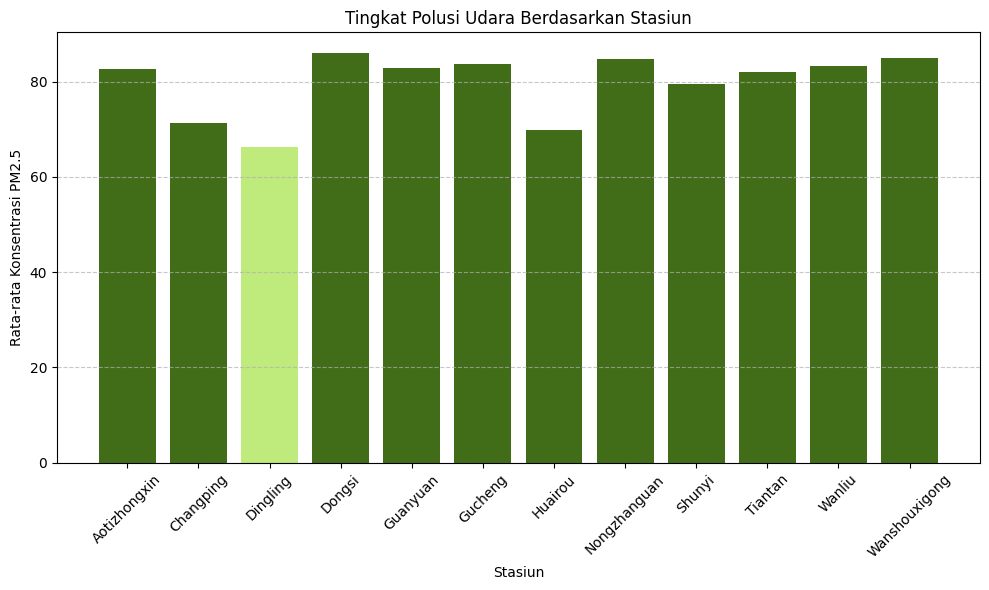

Stasiun dengan tingkat polusi paling rendah adalah: Dingling


In [13]:
avg_pollution_by_station = combined_df.groupby('station').mean()
station_with_lowest_pollution = avg_pollution_by_station['PM2.5'].idxmin()

plt.figure(figsize=(10, 6))
colors = ['#416D19' if station != station_with_lowest_pollution else '#BFEA7C' for station in avg_pollution_by_station.index]
plt.bar(avg_pollution_by_station.index, avg_pollution_by_station['PM2.5'], color=colors)
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata Konsentrasi PM2.5')
plt.title('Tingkat Polusi Udara Berdasarkan Stasiun')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Stasiun dengan tingkat polusi paling rendah adalah:", station_with_lowest_pollution)

In [14]:
combined_df.to_csv("all_data.csv", index=False)

## Conclusion

- Conclusion pertanyaan 1 <br>
Pada tahun **2016 dan 2017** terdapat penurunan rata-rata konsentrasi PM2.5. PM2.5 sendiri disebut partikel yang sangat berbahaya [sumber](https://ejurnal.ung.ac.id/index.php/jhsj/article/view/13447). Untuk dapat menyimpulkan bahwa pada tahun 2016 dan 2017 mengalami penurunan, hal pertama yang perlu dilakukan adalah mengumpulkan parameter PM2.5 untuk setiap stasiun yang ada. Kemudian  menghitung rata-rata konsentrasi PM2.5. <br> <br>
- Conclusion pertanyaan 2 <br>
Stasiun dengan tingkat polusi paling rendah adalah stasiun **Dingling**. Untuk dapat menyimpulkan hal tersebut diperlukan mencari setiap rata-rata konsentrasi PM2.5 yang kemudian dikumpulkan dan dilakukan perbandingan melalui visualisasi data.